In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ReadData( fileName ):
    """This function takes a filename as input, and returns a dataframe with
    raw data read from that file in a Pandas DataFrame.  The DataFrame index
    should be the year, month and day of the observation.  DataFrame headers
    should be "agency_cd", "site_no", "Date", "Discharge", "Quality". The 
    "Date" column should be used as the DataFrame index. The pandas read_csv
    function will automatically replace missing values with np.NaN, but needs
    help identifying other flags used by the USGS to indicate no data is 
    availabiel.  Function returns the completed DataFrame."""
    
    # define column names
    colNames = ['agency_cd', 'site_no', 'Date', 'Discharge', 'Quality']

    # open and read the file
    DataDF = pd.read_csv(fileName, header=1, names=colNames,  
                         delimiter=r"\s+",parse_dates=[2], comment='#',
                         na_values=['Eqp'])
    
    DataDF = DataDF.set_index('Date')
    
    # quantify the number of missing values
    #MissingValues = DataDF["Discharge"].isnull().sum()
    
     # replace negative values with nan
    #DataDF.loc[DataDF['Discharge'] < 0, 'Discharge'] = np.NaN
    
   
    return( DataDF, MissingValues )

In [ ]:
'WildcatCreek_Discharge_03335000_19540601-20200315.txt'
'TippecanoeRiver_Discharge_03331500_19431001-20200315.txt'
#ClipData(DataDF, '1969-10-01', '2019-09-30')

In [116]:
w = ReadData( 'WildcatCreek_Discharge_03335000_19540601-20200315.txt' )

In [69]:
t = ReadData( 'TippecanoeRiver_Discharge_03331500_19431001-20200315.txt' )

In [117]:
type(w)

tuple

In [68]:
type(w.index)

builtin_function_or_method

In [108]:
def ClipData( DataDF, startDate, endDate ):
    """This function clips the given time series dataframe to a given range 
    of dates. Function returns the clipped dataframe and and the number of 
    missing values."""
    
    #clip data 
    DataDF = DataDF.loc[startDate:endDate]  
    
    # quantify the number of missing values
    MissingValues = DataDF["Discharge"].isna().sum()         # Delete?
    
    return( DataDF )

In [5]:
def ReadMetrics( fileName ):
    """This function takes a filename as input, and returns a dataframe with
    the metrics from the assignment on descriptive statistics and 
    environmental metrics.  Works for both annual and monthly metrics. 
    Date column should be used as the index for the new dataframe.  Function 
    returns the completed DataFrame."""
    
    # open and read the csv file
    DataDF = pd.read_csv(fileName, header=0, parse_dates=[0], index_col='Date')
    
    return( DataDF )

In [13]:
m = ReadMetrics('Annual_Metrics-Copy1.csv')
m.head()
type(m.index)
#,infer_datetime_format=True,

pandas.core.indexes.datetimes.DatetimeIndex

In [4]:
def GetMonthlyAverages(DataDF):
    """This function calculates annual average monthly flow.  
    The routine returns an array of mean values 
    for the Discharge values in the original dataframe."""
    
    colName = ['Discharge']
    
    # define index as dates of ressmpled data. 
    # data is resampled monthly
    monthlyIndex = DataDF.resample('MS').mean().index
    
    # create empty dataframe
    MoDataDF = pd.DataFrame(data=0, index=monthlyIndex, columns=colName)
    
    # add resampled discharge data to dataframe
    MoDataDF['Discharge'] = DataDF['Discharge'].resample('MS').mean()
    
    # compute monthly averages
    MonthlyAverages = MoDataDF.groupby(MoDataDF.index.month).mean()
    
    
    return( MonthlyAverages )

tuple

In [6]:
 # define column names
colNames = ['agency_cd', 'site_no', 'Date', 'Discharge', 'Quality']

    # open and read the file
w2 = pd.read_csv('WildcatCreek_Discharge_03335000_19540601-20200315.txt', header=1, names=colNames,  
                         delimiter=r"\s+",parse_dates=[2], comment='#',
                         na_values=['Eqp'])
    
w2 = w2.set_index('Date')
    
    # quantify the number of missing values
MissingValues = w2["Discharge"].isnull().sum()
    
     # replace negative values with nan
w2.loc[w2['Discharge'] < 0, 'Discharge'] = np.NaN
    

In [7]:
 # define column names
colNames = ['agency_cd', 'site_no', 'Date', 'Discharge', 'Quality']

    # open and read the file
w3 = pd.read_csv('TippecanoeRiver_Discharge_03331500_19431001-20200315.txt', header=1, names=colNames,  
                         delimiter=r"\s+",parse_dates=[2], comment='#',
                         na_values=['Eqp'])
  
w3 = w3.set_index('Date')
    
    # quantify the number of missing values
MissingValues = w3["Discharge"].isnull().sum()
    
     # replace negative values with nan
w3.loc[w3['Discharge'] < 0, 'Discharge'] = np.NaN

In [93]:
type(w2.index)
w2

,agency_cd,site_no,Discharge,Quality
Date,,,,
1954-06-01,USGS,3335000,1050.0,A
1954-06-02,USGS,3335000,1950.0,A
1954-06-03,USGS,3335000,1530.0,A
1954-06-04,USGS,3335000,1740.0,A
1954-06-05,USGS,3335000,1130.0,A
1954-06-06,USGS,3335000,800.0,A
1954-06-07,USGS,3335000,565.0,A
1954-06-08,USGS,3335000,498.0,A
1954-06-09,USGS,3335000,800.0,A


In [8]:
#moW = GetMonthlyAverages(w)
type(w)
type(w2)
moW = GetMonthlyAverages(w2)

NameError: name 'w' is not defined

In [97]:
moW

,Discharge
Date,
1,988.301760
2,1109.991846
3,1363.494379
4,1380.197249
5,1048.160786
6,1011.121717
7,658.244575
8,321.804448
9,310.947020


In [98]:
#Daily flow for both streams for the last 5 years of the record.   2015-2019
m.tail()

,site_no,Mean Flow,Peak Flow,Median Flow,Coeff Var,Skew,Tqmean,R-B Index,7Q,3xMedian,Station
Date,,,,,,,,,,,
2015-09-30,3331500,1037.495890,5720.0,788.0,73.948916,2.417206,0.287671,0.093999,353.000000,29,Tippe
2016-09-30,3331500,760.893443,2670.0,572.0,62.080192,1.247382,0.385246,0.079716,213.142857,17,Tippe
2017-09-30,3331500,1116.320548,2880.0,959.0,57.216680,0.926114,0.397260,0.083582,330.857143,1,Tippe
2018-09-30,3331500,1055.750685,7940.0,755.0,93.868192,3.800612,0.350685,0.088564,275.571429,21,Tippe
2019-09-30,3331500,1167.331507,3920.0,1160.0,52.870816,1.006355,0.498630,0.074015,319.285714,3,Tippe


In [9]:
 # define full river names as a dictionary so that abbreviations are not used in figures
riverName = { "Wildcat": "Wildcat Creek",
                  "Tippe": "Tippecanoe River" }
    
    # define txt filenames as a dictionary
fileName = { "Wildcat": "WildcatCreek_Discharge_03335000_19540601-20200315.txt",
                 "Tippe": "TippecanoeRiver_Discharge_03331500_19431001-20200315.txt" }
    
    # define csv names as a dictionary
csvName = {"Annual": "Annual_Metrics-Copy.csv",
               "Monthly": "Monthly_Metrics-Copy.csv"}
    
    # define blank dictionaries for each file type
DataDF = {}
MetricsDF = {}
MonthlyAverages = {}
    
    # process txt files to get daily streamflow values and annual monhtly averages
for file in fileName.keys():
        
    DataDF[file] = ReadData(fileName[file])
        
    DataDF[file] = ClipData( DataDF[file], '1969-10-01', '2019-09-30' )
        
    MonthlyAverages[file] = GetMonthlyAverages(DataDF[file])
        
    # process csv files to get daily metrics   
for csv in csvName.keys():
    MetricsDF[csv] = ReadMetrics(csvName[csv])

NameError: name 'ClipData' is not defined

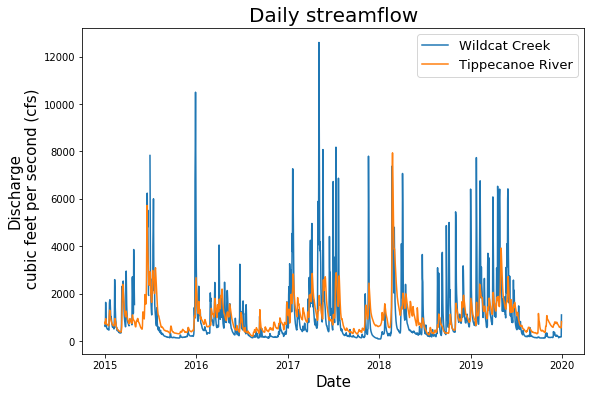

In [32]:
#Daily streamflow of Wildcat Creek and Tippecanoe River

plt.plot(w2['2015-01-01':'2019-12-30']['Discharge'], label="Wildcat Creek")
plt.plot(w3['2015-01-01':'2019-12-30']['Discharge'], label="Tippecanoe River")
plt.xlabel('Date', fontsize=15)
plt.ylabel('Discharge\n cubic feet per second (cfs)', fontsize=15)
plt.title('Daily streamflow', fontsize=20)
plt.legend(fontsize=13)
fig = plt.gcf()
fig.set_size_inches(9, 6)
plt.savefig('Daily-streamflow.png', dpi=96)
plt.show()
#w2.tail()

#plt.plot(DataDF['Wildcat']['2015-01-01':'2019-12-30']['Discharge'], label="Wildcat Creek")
#plt.plot(DataDF['Tippe']['2015-01-01':'2019-12-30']['Discharge'], label="Tippecanoe River")
#plt.xlabel('Date', fontsize=15)
#plt.ylabel('Discharge\n cubic feet per second (cfs)', fontsize=15)
#plt.title('Daily streamflow of Wildcat Creek and Tippecanoe River', fontsize=16)
#plt.legend(fontsize=13)
#fig = plt.gcf()
#fig.set_size_inches(9, 6)
#plt.savefig('Daily-streamflow.png', dpi=96)
#plt.show()

In [ ]:
# Annual Coefficient of Variation

plt.plot(m[])

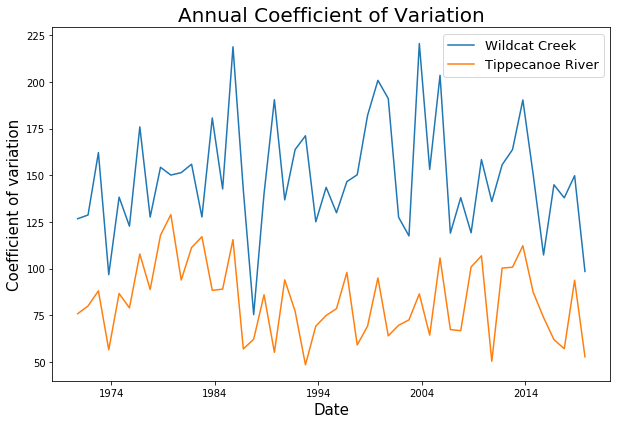

KeyError: 'Wildcat'

In [31]:
# Annual Coefficient of Variation

plt.plot(m['Coeff Var'][0:50], label='Wildcat Creek')
plt.plot(m['Coeff Var'][50:101], label='Tippecanoe River')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Coefficient of variation', fontsize=15)
plt.title('Annual Coefficient of Variation', fontsize=20)
plt.legend(fontsize=13)
fig = plt.gcf()
fig.set_size_inches(10, 6.5)
plt.savefig('annual-CV.png', dpi=96)
plt.show()

plt.plot(MetricsDF['Wildcat']['Coeff Var'][0:50], label='Wildcat Creek')
plt.plot(MetricsDF['Tippe']['Coeff Var'][50:101], label='Tippecanoe River')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Coefficient of variation', fontsize=15)
plt.title('Annual Coefficient of Variation', fontsize=20)
plt.legend(fontsize=13)
fig = plt.gcf()
fig.set_size_inches(10, 6.5)
plt.savefig('annual-CV.png', dpi=96)
plt.show()


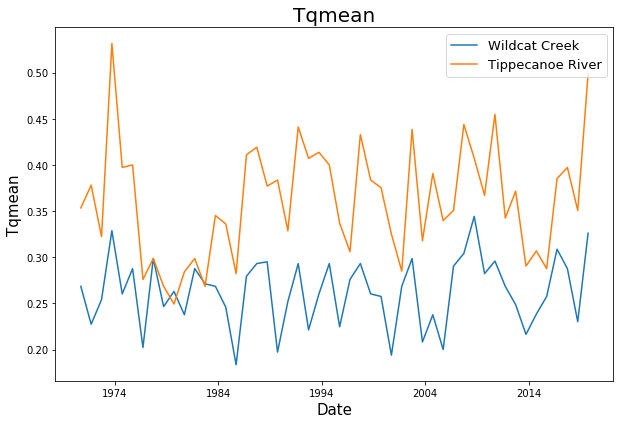

In [29]:
# Annual TQ mean

plt.plot(m['Tqmean'][0:50], label='Wildcat Creek')
plt.plot(m['Tqmean'][50:101], label='Tippecanoe River')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Tqmean', fontsize=15)
plt.title('Tqmean', fontsize=20)
plt.legend(loc="upper right", fontsize=13)
fig = plt.gcf()
fig.set_size_inches(10, 6.5)
plt.savefig('Tqmean.png', dpi=96)
plt.show()

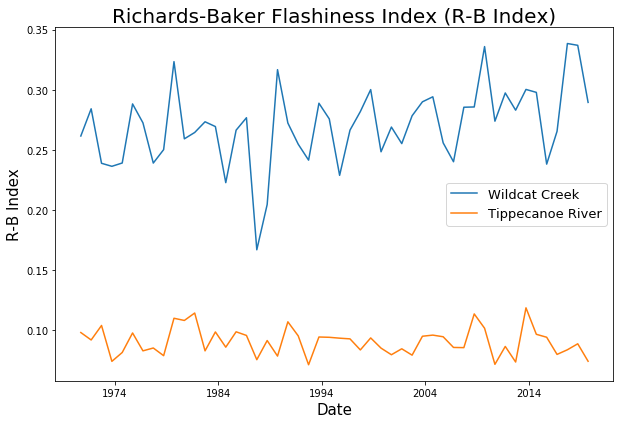

In [28]:
# Annual R-B Index

plt.plot(m['R-B Index'][0:50], label='Wildcat Creek')
plt.plot(m['R-B Index'][50:101], label='Tippecanoe River')
plt.xlabel('Date', fontsize=15)
plt.ylabel('R-B Index', fontsize=15)
plt.title('Richards-Baker Flashiness Index (R-B Index)', fontsize=20)
plt.legend( fontsize=13)
fig = plt.gcf()
fig.set_size_inches(10, 6.5)
plt.savefig('RBindex.png')
plt.show()

In [200]:
len(m['R-B Index'][0:50])

50

In [224]:
def GetMonthlyAverages(DataDF):
    """This function calculates annual average monthly flow.  
    The routine returns an array of mean values 
    for the Discharge values in the original dataframe."""
    
    colName = ['Discharge']
    
    # define index as dates of ressmpled data. 
    # data is resampled monthly
    monthlyIndex = DataDF.resample('MS').mean().index
    
    # create empty dataframe
    MoDataDF = pd.DataFrame(data=0, index=monthlyIndex, columns=colName)
    
    # add resampled discharge data to dataframe
    MoDataDF['Discharge'] = DataDF['Discharge'].resample('MS').mean()
    
    # compute monthly averages
    MonthlyAverages = MoDataDF.groupby(MoDataDF.index.month).mean()
    
    
    return( MonthlyAverages )

In [17]:
wmav = GetMonthlyAverages(w2)

In [18]:
tmav = GetMonthlyAverages(w3)

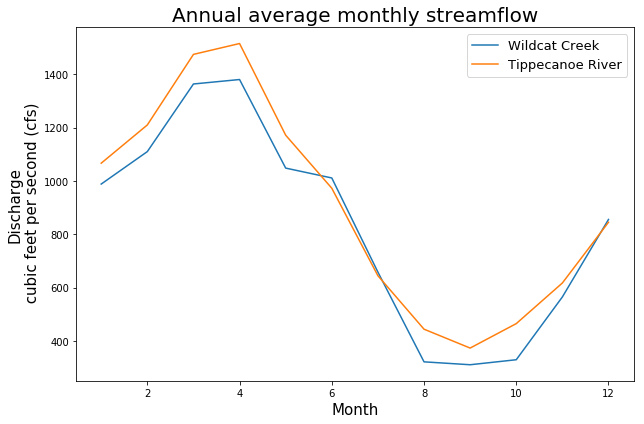

In [33]:
plt.plot(wmav, label='Wildcat Creek')
plt.plot(tmav, label='Tippecanoe River')
plt.xlabel('Month', fontsize=15)
plt.ylabel('Discharge\n cubic feet per second (cfs)', fontsize=15)
plt.title('Annual average monthly streamflow', fontsize=20)
plt.legend( fontsize=13)
fig = plt.gcf()
fig.set_size_inches(10, 6.5)
plt.savefig('monthly-averages.png')
plt.show()